<a href="https://colab.research.google.com/github/nik-hil-29/EMG-and-Speech-Models/blob/main/EMG%20Signal%20Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!pip install --upgrade lida bigframes google-colab


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip install --upgrade tensorflow-probability


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 45.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.23.0
    Uninstalling tensorflow-probability-0.23.0:
      Successfully uninstalled tensorflow-probability-0.23.0


In [4]:
!pip install pandas

In [ ]:
#!pip install entropy

In [ ]:
#!pip install nolds



In [ ]:
#!pip install pyentrp


In [5]:
!pip install neurokit2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.3 MB/s eta 0:00:00


In [6]:
!pip install update scipy  numpy

manual signal processing

In [7]:
import pandas as pd
import numpy as np
#from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq , ifft
from scipy.signal import butter, lfilter, hilbert
from scipy.stats import skew, kurtosis
#from nolds import sampen
#from pyentrp import entropy as ent


In [10]:
df = pd.read_csv('/gdrive/MyDrive/emg_dataset_final/up/up15.csv', sep=';',skiprows=1, skipfooter=1, engine='python')


In [11]:
# Function to apply frequency domain transform
def apply_frequency_transform(data):
    fft_result = fft(data)
    return np.abs(fft_result)


In [12]:
# Function to apply bandpass filter
def apply_bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

In [13]:
# Function to apply rectification
def apply_rectification(data):
    return np.abs(data)

# Function to apply RMS envelope of 50ms window
def apply_rms_envelope(data, window_size, fs):
    window_size_samples = int(window_size * fs / 1000)
    squared_values = np.square(data)
    rolling_mean = np.sqrt(np.convolve(squared_values, np.ones(window_size_samples)/window_size_samples, mode='valid'))
    return np.concatenate((np.zeros(window_size_samples-1), rolling_mean))


In [14]:
# Function to apply frequency domain transform and plot FFT
def apply_and_plot_fft(data, fs, label):
    N = len(data)
    T = 1.0 / fs
    xf = fftfreq(N, T)[:N//2]
    yf = 2.0/N * np.abs(fft(data))[:N//2]

    plt.plot(xf, yf, label=label)
    plt.title('FFT of ' + label)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

In [15]:
#Define cutoff frequencies and sampling frequency
lowcut = 20  # set your low cutoff frequency
highcut = 230  # set your high cutoff frequency
fs = 650  # set your sampling frequency
columns_to_ignore = ['Vbat', 'Trigger', 'AccX', 'AccY', 'AccZ', 'GyX', 'GyY', 'GyZ', 'fs','N', 'Timestamp']

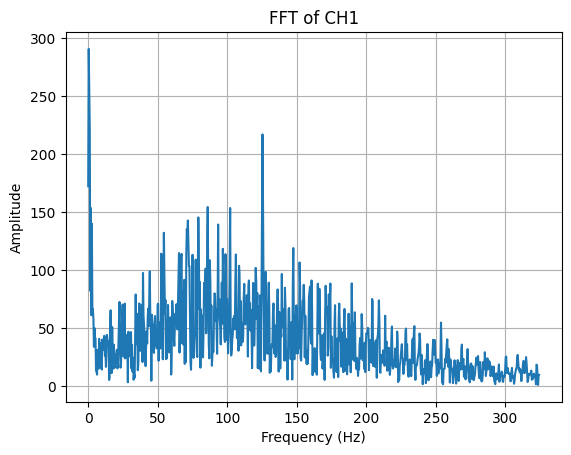

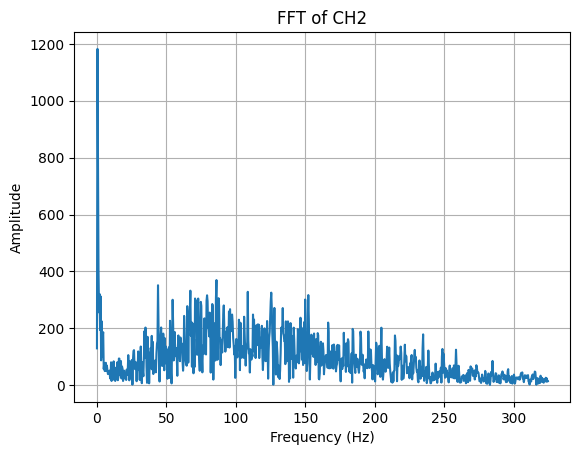

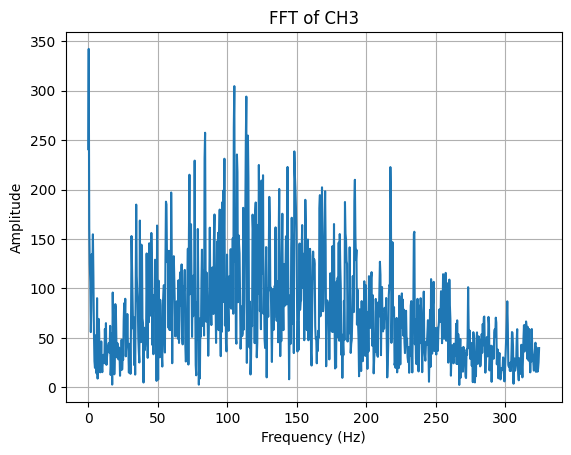

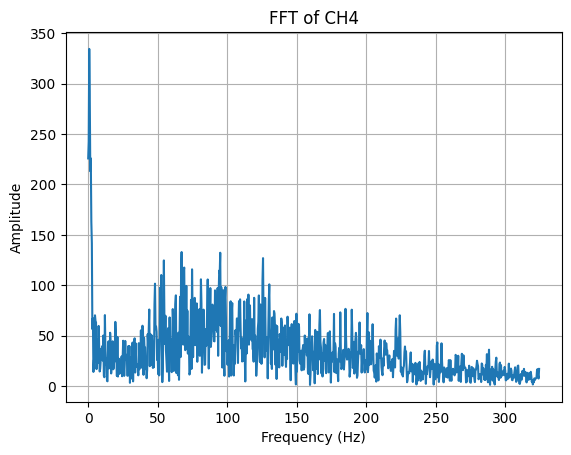

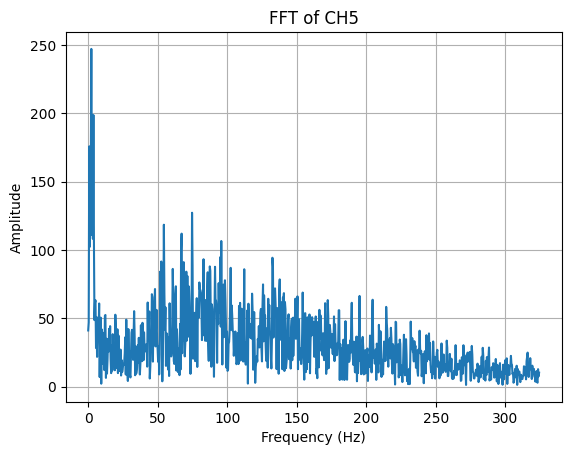

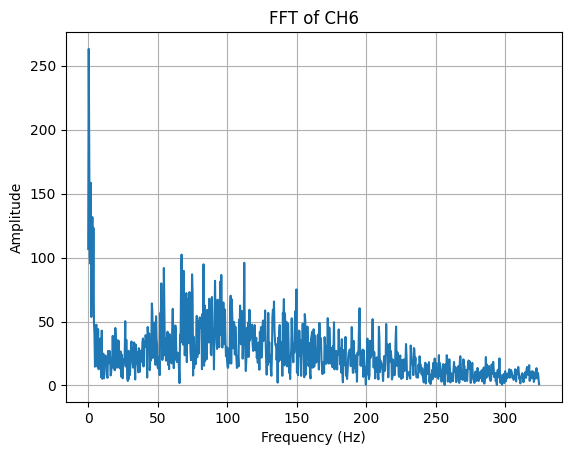

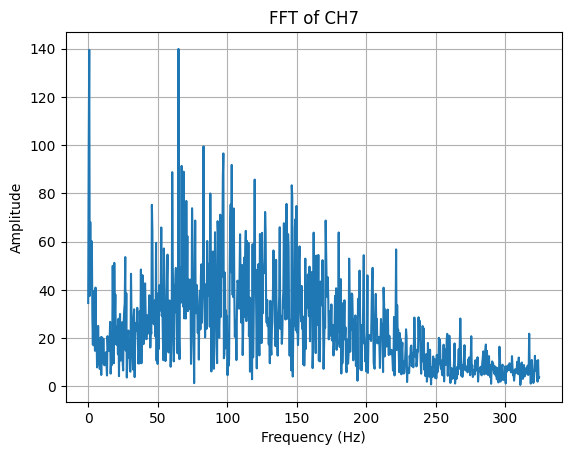

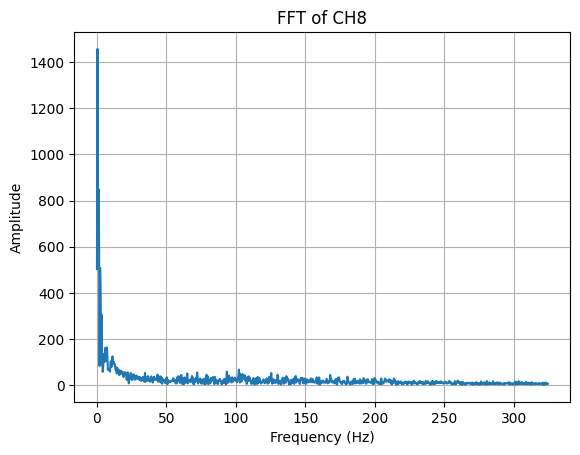

In [16]:
for col in df.columns:
    if col not in columns_to_ignore:
        data = pd.to_numeric(df[col], errors='coerce').dropna().values
        apply_and_plot_fft(data, fs, col)

In [17]:

# Apply operations to each channel
for col in df.columns:
    if col not in columns_to_ignore:
        data = df[col].values

        # Calculate MVC normalization
        mvc_value = np.max(np.abs(data))
        normalized_data = data / mvc_value

        # Frequency domain transform
        transformed_data = apply_frequency_transform(normalized_data)

        # Bandpass filter
        filtered_data = apply_bandpass_filter(transformed_data, lowcut, highcut, fs)

        # Rectification
        rectified_data = apply_rectification(filtered_data)

        # RMS envelope of 50ms window
        window_size = 50  # set your window size
        rms_envelope = apply_rms_envelope(rectified_data, window_size, fs)

        # Update the dataframe with the processed data
        df[col] = rms_envelope

# Save the output to a new CSV file
df.to_csv('/gdrive/MyDrive/output_file.csv', index=False)


In [18]:
df_output = pd.read_csv('/gdrive/MyDrive/output_file.csv')

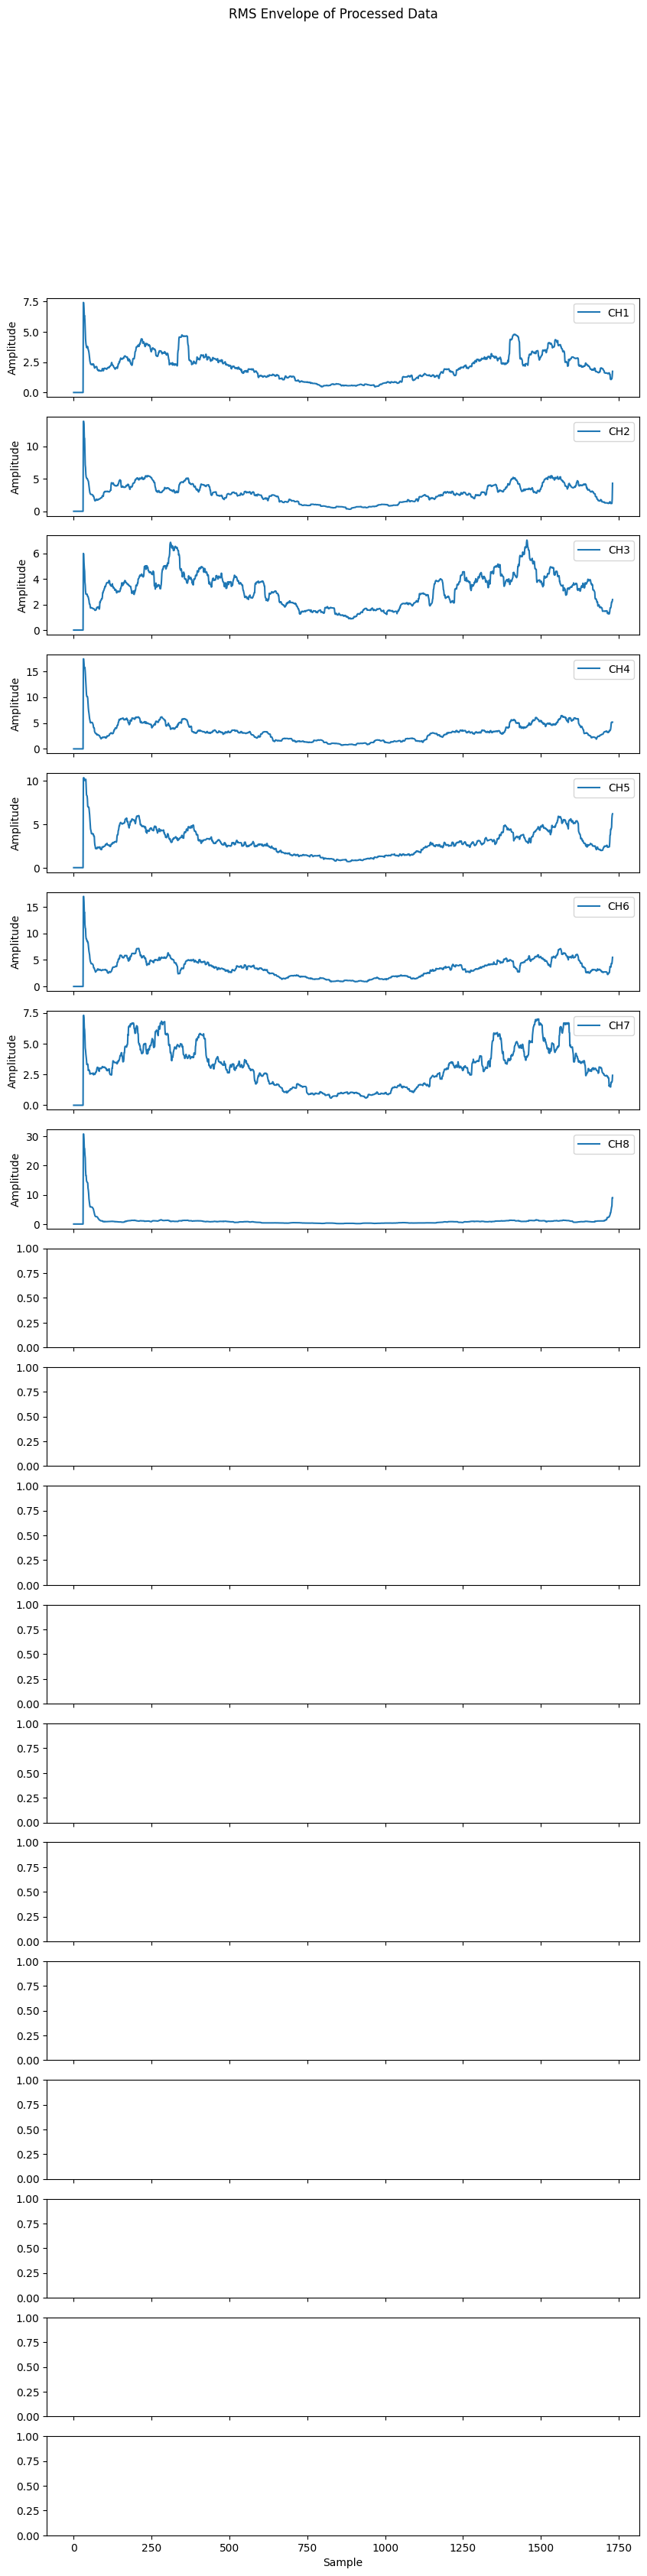

In [19]:
num_channels = len(df_output.columns)

# Create subplots
fig, axs = plt.subplots(num_channels, 1, sharex=True, figsize=(10, 2*num_channels))

# Plot each channel in a separate subplot
for i, col in enumerate(df_output.columns):
    if col not in columns_to_ignore:
      axs[i].plot(df_output[col], label=col)
      axs[i].set_ylabel('Amplitude')
      axs[i].legend()

# Set common labels and display the plot
plt.xlabel('Sample')
plt.suptitle('RMS Envelope of Processed Data')
plt.show()

####################################################################################################################################################################################################################################################

Implementation using nuerokit2

In [25]:
df = pd.read_csv('/gdrive/MyDrive/emg_dataset_final/up/up15.csv', sep=';',skiprows=1, skipfooter=1, engine='python')

In [26]:
df

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,Vbat,Trigger,AccX,AccY,AccZ,GyX,GyY,GyZ,N,fs,Timestamp
0,-74.178961,57.286081,104.537762,184.605024,52.198937,-191.833019,-288.288257,-47.337537,3524,0,1027,-15726,5198,-53,19,-25,283185,500,17:37:07.677717
1,156.565137,303.882818,322.057714,353.144276,199.626174,-187.695930,-507.795178,25.531995,3524,0,1027,-15726,5198,-53,19,-25,283186,500,17:37:07.677770
2,325.790571,331.745234,239.718543,108.154025,-60.243948,-16.653766,-232.636604,249.533724,3524,0,1027,-15726,5198,-53,19,-25,283187,500,17:37:07.677780
3,24.835468,9.448003,-34.388574,-123.843611,-263.204195,-125.002105,-158.660546,10.623841,3524,0,1027,-15726,5198,-53,19,-25,283188,500,17:37:07.677789
4,-80.569302,-139.887939,-69.553472,-120.402613,-177.420655,-122.680414,28.678759,-48.416156,3524,0,1027,-15726,5198,-53,19,-25,283189,500,17:37:07.677800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,1220.732387,-1520.412392,792.128871,1315.799187,844.897982,85.863871,-55.193772,-5949.644253,3524,0,1205,-15527,5292,-2993,148,-253,284911,500,17:37:11.034794
1727,1492.202313,-1207.119108,1178.787710,1601.826539,1279.238947,356.181672,402.915814,-5959.952667,3524,0,1205,-15527,5292,-2993,148,-253,284912,500,17:37:11.034852
1728,1248.444294,-1515.801005,749.674812,1254.184046,889.258817,231.573783,-41.070344,-6334.603415,3524,0,1205,-15527,5292,-2993,148,-253,284913,500,17:37:11.034897
1729,620.120255,-2135.586238,60.560932,563.022451,83.759127,-255.198247,-359.267169,-6888.170134,3524,0,1205,-15527,5292,-2993,148,-253,284914,500,17:37:11.035711


In [24]:
df.shape

(1000, 19)

We wil take only 2 sec of data as the most of the information is between 0-2 sec

In [27]:
import pandas as pd

# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Filter rows where Timestamp is between 0.5 and 2.5 seconds
start_time = df['Timestamp'].iloc[0] + pd.DateOffset(seconds=0.5)
end_time = df['Timestamp'].iloc[0] + pd.DateOffset(seconds=2.5)
df = df[(df['Timestamp'] >= start_time) & (df['Timestamp'] <= end_time)]
df = df.head(1000)


<ipython-input-27-3bbb562d7fd4>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [29]:
df

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,Vbat,Trigger,AccX,AccY,AccZ,GyX,GyY,GyZ,N,fs,Timestamp
196,12.779043,67.763741,-167.078597,-342.911178,-98.603521,-229.784200,58.475720,-29.673545,3524,0,1024,-15735,5167,-192,105,40,283381,500,2024-05-19 17:37:08
197,99.697618,238.845131,-20.100525,-186.168027,45.872102,-223.609991,114.319982,76.130105,3524,0,1024,-15735,5167,-192,105,40,283382,500,2024-05-19 17:37:08
198,255.089098,508.149090,255.223662,147.499377,437.972055,164.094459,314.549343,134.897182,3524,0,1024,-15735,5167,-192,105,40,283383,500,2024-05-19 17:37:08
199,425.423754,677.676703,390.956395,383.582064,577.715526,167.339808,340.347828,266.462318,3524,0,1024,-15735,5167,-192,105,40,283384,500,2024-05-19 17:37:08
200,282.572026,557.868024,61.893018,175.478195,344.030132,227.181602,368.792032,31.669154,3524,0,1024,-15735,5167,-192,105,40,283385,500,2024-05-19 17:37:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,-140.296571,-1023.204450,1163.558275,1876.332646,926.818959,1256.603428,777.426140,-800.828519,3524,0,1058,-15646,5428,77,30,44,284376,500,2024-05-19 17:37:09
1192,1774.594857,3120.200406,-616.567683,123.151569,-765.099314,-406.236913,-173.893941,-798.492001,3524,0,1058,-15646,5428,77,30,44,284377,500,2024-05-19 17:37:09
1193,1354.049989,2814.413448,239.113164,304.820668,-605.378545,-698.788610,-702.910068,-959.127724,3524,0,1058,-15646,5428,77,30,44,284378,500,2024-05-19 17:37:09
1194,-1125.307333,-429.154297,-172.990006,1134.119223,464.630494,658.978027,546.557259,-1479.443474,3524,0,1058,-15646,5428,77,30,44,284379,500,2024-05-19 17:37:09


In [30]:
from neurokit2 import *
import neurokit2 as nk

In [34]:
emg_signal_up1 , info_2 = emg_process(df["CH1"] ,fs )

In [35]:
emg_signal_up1

,EMG_Raw,EMG_Clean,EMG_Amplitude,EMG_Activity,EMG_Onsets,EMG_Offsets
0,12.779043,0.014051,-1402.720842,0.0,0,0
1,99.697618,-83.418938,-1032.121613,0.0,0,0
2,255.089098,-42.944562,-662.448185,0.0,0,0
3,425.423754,107.716015,-294.235456,0.0,0,0
4,282.572026,46.425701,72.004900,0.0,0,0
...,...,...,...,...,...,...
995,-140.296571,-877.293174,765669.966488,0.0,0,0
996,1774.594857,668.939331,761895.124931,0.0,0,0
997,1354.049989,711.391374,758584.964289,0.0,0,0
998,-1125.307333,-222.546131,755724.678784,0.0,0,0


the important thing is emg_process contains everything in it which is amplitude , cleaned , onset offset , activation refer this link : https://neuropsychology.github.io/NeuroKit/functions/emg.html#neurokit2.emg.emg_clean

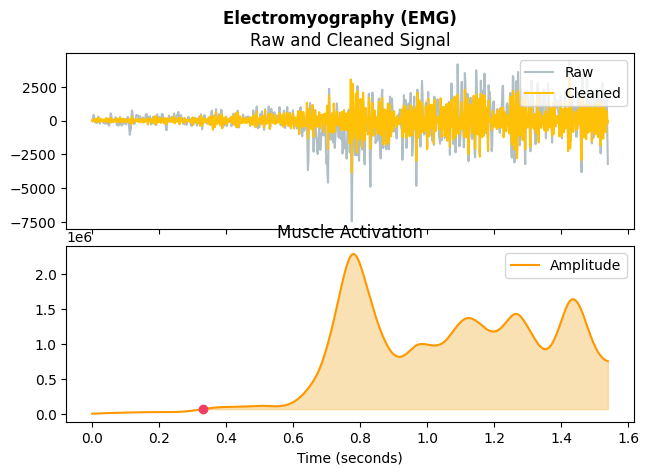

In [36]:
emg_plot(emg_signal_up1, info=info_2, static=True)

In [38]:
clean_emg = emg_clean(df["CH6"], sampling_rate=650, method='biosppy')

In [39]:
clean_emg

array([ 3.42103976e-01, -1.99407978e+02,  4.12557718e+01,  7.35724611e+00,
        1.59589973e+02, -3.53029384e+01, -1.17758481e+02, -6.12377272e+01,
        2.00505807e+02, -5.56451927e+01, -1.64863800e+02,  3.48324615e+01,
        1.90176036e+02,  8.34242063e+01, -1.74785689e+02, -1.95760842e+02,
        9.69077578e+01,  1.81161969e+02, -2.56492185e+01, -3.49849097e+01,
       -4.66734061e+01,  1.46941716e+01, -4.94179381e+01,  5.46043871e+01,
       -1.25004821e+01,  7.41700786e+01, -8.85145462e+01,  5.96136578e+01,
       -4.52976815e+01,  1.24106411e+01, -8.43462277e+01,  1.06959216e+02,
        6.16632468e+01, -9.29636114e+01,  5.18046954e+01, -1.18002750e+02,
        4.18604835e+01, -1.20056113e+01,  1.08830305e+02,  5.07196169e+01,
       -1.55690793e+02, -1.93130641e+01,  1.28361787e+02, -7.16306373e+01,
       -1.20678007e+02,  1.01816351e+02,  2.03046795e+02, -1.44307008e+02,
       -1.45583091e+02,  1.13894693e+02,  5.31726552e+01, -4.37069184e+01,
       -5.32776137e+01, -

In [40]:
emg_amp = emg_amplitude(clean_emg)

In [41]:
emg_amp

array([ 11299.97593124,  11372.62779561,  11446.55742609,  11521.47902914,
        11597.17526933,  11673.49638001,  11750.31528348,  11827.49709092,
        11904.89130132,  11982.32356477,  12059.59141963,  12136.46144973,
        12212.66295662,  12287.89134521,  12361.82905859,  12434.18170484,
        12504.71749366,  12573.2833052 ,  12639.78308129,  12704.14650036,
        12766.32401791,  12826.30194503,  12884.1127331 ,  12939.83484539,
        12993.58840875,  13045.53277608,  13095.8625456 ,  13144.79763334,
        13192.57725867,  13239.46373671,  13285.74644647,  13331.73031029,
        13377.70189375,  13423.89596678,  13470.49803768,  13517.67643062,
        13565.60011639,  13614.43484904,  13664.3430708 ,  13715.47875952,
        13767.96632411,  13821.88752423,  13877.28001322,  13934.12908245,
        13992.35918141,  14051.84381794,  14112.44461212,  14174.07796095,
        14236.77237496,  14300.66677483,  14365.95188096,  14432.80782691,
        14501.37865547,  

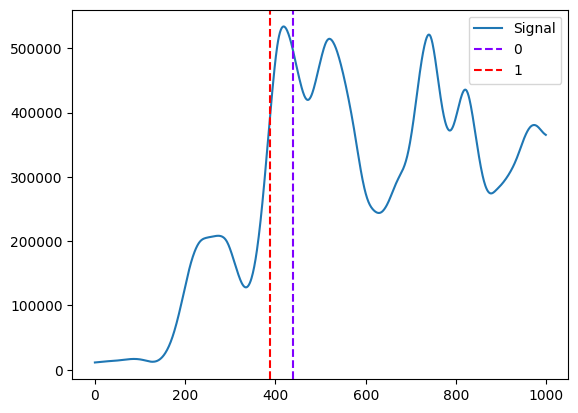

In [42]:
activity, info = nk.emg_activation(emg_cleaned=clean_emg, method="biosppy")

nk.events_plot([info["EMG_Offsets"], info["EMG_Onsets"]], emg_amp)

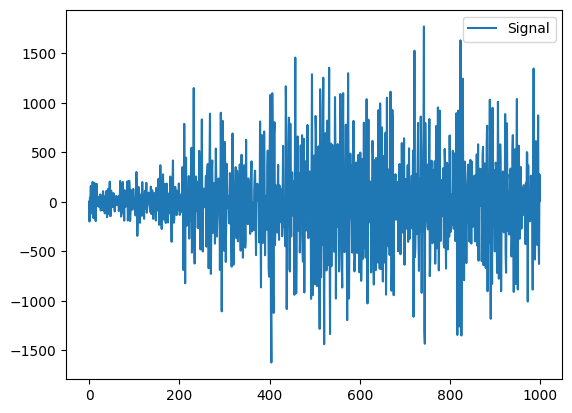

In [43]:
activity, info = nk.emg_activation(emg_amplitude=emg_amp, method="threshold")
nk.events_plot([info["EMG_Offsets"], info["EMG_Onsets"]], clean_emg)

our aim from this observations are to obtain the emg_clean from the all the samples and save it channel wise and with offset , on set and activity and  amplitude .... take all the 5 features of the signal drop the raw for all .....the dataset will be like [up{100 samples of 1600 signals with 5 features contains the key as "0"},down{100 samples of 1600 signals with 5 features contains the key as "1"},left{100 samples of 1600 signals with 5 features contains the key as "2" , right{100 samples of 1600 signals with 5 features contains the key as "3"}]

Signal processing ends .......if required do with another method like using mne features or any other manual feature.

############################################################################################################################################################################################################################################################################################



Data creation for UP

In [ ]:
!pip install neurokit2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.0 MB/s eta 0:00:00


In [44]:
import pandas as pd
import numpy as np
#from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq , ifft
from scipy.signal import butter, lfilter, hilbert
from scipy.stats import skew, kurtosis
from neurokit2 import *
import neurokit2 as nk

In [ ]:
# import os
# import pandas as pd

# path_directory = '/gdrive/MyDrive/emg_dataset_final/down/'

# for i in range(1, 101):
#     filename = f'{path_directory}down{i}.csv'
#     df = pd.read_csv(filename, sep=';', skiprows=1, skipfooter=1, engine='python')
#     columns_to_ignore = ['Vbat', 'Trigger', 'AccX', 'AccY', 'AccZ', 'GyX', 'GyY', 'GyZ', 'fs', 'N', 'Timestamp']
#     df_processed = df.drop(columns=columns_to_ignore)
#     rows, cols = df_processed.shape
#     if rows < 1000 and cols == 8:
#         print("File:", filename)
#         print("Shape (rows, columns):", (rows, cols))


In [45]:
import os
import pandas as pd

path_directory = '/gdrive/MyDrive/emg_dataset_final/up/'

count_samples_more_than_1000 = 0

for i in range(1, 101):
    filename = f'{path_directory}up{i}.csv'
    df = pd.read_csv(filename, sep=';', skiprows=1, skipfooter=1, engine='python')
    if df.shape[0] > 1000:
        count_samples_more_than_1000 += 1

print("Number of samples with more than 1000 rows:", count_samples_more_than_1000)


Number of samples with more than 1000 rows: 100


In [46]:
import os
import pandas as pd

path_directory = '/gdrive/MyDrive/emg_dataset_final/down/'

count_samples_more_than_1000 = 0

for i in range(1, 101):
    filename = f'{path_directory}down{i}.csv'
    df = pd.read_csv(filename, sep=';', skiprows=1, skipfooter=1, engine='python')
    if df.shape[0] >= 1000:
        count_samples_more_than_1000 += 1

print("Number of samples with more than 1000 rows:", count_samples_more_than_1000)

Number of samples with more than 1000 rows: 100


In [47]:
import os
import pandas as pd

path_directory = '/gdrive/MyDrive/emg_dataset_final/left/'

count_samples_more_than_1000 = 0

for i in range(1, 101):
    filename = f'{path_directory}left{i}.csv'
    df = pd.read_csv(filename, sep=';', skiprows=1, skipfooter=1, engine='python')
    if df.shape[0] >= 1000:
        count_samples_more_than_1000 += 1

print("Number of samples with more than 1000 rows:", count_samples_more_than_1000)

Number of samples with more than 1000 rows: 100


In [48]:
import os
import pandas as pd

path_directory = '/gdrive/MyDrive/emg_dataset_final/right/'

count_samples_more_than_1000 = 0

for i in range(1, 101):
    filename = f'{path_directory}right{i}.csv'
    df = pd.read_csv(filename, sep=';', skiprows=1, skipfooter=1, engine='python')
    if df.shape[0] > 1000:
        count_samples_more_than_1000 += 1

print("Number of samples with more than 1000 rows:", count_samples_more_than_1000)

Number of samples with more than 1000 rows: 100


In [49]:

fs = 500  # set your sampling frequency


In [50]:
import pandas as pd

path_directory = '/gdrive/MyDrive/emg_dataset_final/up/'

emg_signals_up = []
infos = []


for i in range(1, 101):
    filename = f'{path_directory}up{i}.csv'
    df = pd.read_csv(filename, sep=';', skiprows=1, skipfooter=1, engine='python')
    columns_to_ignore = ['Vbat', 'Trigger', 'AccX', 'AccY', 'AccZ', 'GyX', 'GyY', 'GyZ', 'fs', 'N', 'Timestamp']
    df_processed = df.drop(columns=columns_to_ignore)
    df_processed = df_processed.head(1000)


    emg_signals = []
    infos_temp = []
    for col_name, col_data in df_processed.items():
        emg_signal, info = emg_process(col_data, fs)
        emg_signals.append(emg_signal)
        infos_temp.append(info)

    emg_signals_up.append(emg_signals)
    infos.append(infos_temp)




/usr/local/lib/python3.10/dist-packages/neurokit2/events/events_find.py:118: NeuroKitWarning: No events found. Check your event_channel or adjust 'threshold' or 'keep' arguments.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/events/events_find.py:118: NeuroKitWarning: No events found. Check your event_channel or adjust 'threshold' or 'keep' arguments.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/events/events_find.py:118: NeuroKitWarning: No events found. Check your event_channel or adjust 'threshold' or 'keep' arguments.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/events/events_find.py:118: NeuroKitWarning: No events found. Check your event_channel or adjust 'threshold' or 'keep' arguments.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/events/events_find.py:118: NeuroKitWarning: No events found. Check your event_channel or adjust 'threshold' or 'keep' arguments.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/events/events_f

In [51]:
for i in range(1, 101):
    exec(f"emg_signal_up{i} = emg_signals_up[i-1]")
    exec(f"info_up_{i} = infos[i-1]")


In [52]:
for i in range(1, 101):
    for j in range(0,8):
        exec(f"emg_signal_up{i}[{j}]['label'] = {0}")


In [53]:
emg_signal_up1[0]

,EMG_Raw,EMG_Clean,EMG_Amplitude,EMG_Activity,EMG_Onsets,EMG_Offsets,label
0,-227.672051,0.093043,9822.933797,0.0,0,0,0
1,84.048074,85.698378,10092.168919,0.0,0,0,0
2,193.122939,23.938180,10364.173539,0.0,0,0,0
3,19.597923,-200.461524,10637.544102,0.0,0,0,0
4,163.256659,70.626186,10910.894533,0.0,0,0,0
...,...,...,...,...,...,...,...
995,164.571322,271.779096,183737.274122,0.0,0,0,0
996,-989.206374,-573.221691,182914.784877,0.0,0,0,0
997,-2.913795,316.212922,182186.996105,0.0,0,0,0
998,241.652480,65.033949,181552.654402,0.0,0,0,0


In [54]:
import h5py

# Create or open an HDF5 file for writing
hdf5_filename = '/gdrive/MyDrive/emg_dataset_final/emg_signals_up.h5'
with h5py.File(hdf5_filename, 'w') as hf:
    # Save each emg_signal_up as a separate dataset
    for i, emg_signal in enumerate(emg_signals_up, start=1):
        dataset_name = f'emg_signal_up_{i}'
        hf.create_dataset(dataset_name, data=emg_signal)


all emg_signal_up from 1 to 100 are created now we need to save all the files individually in .hdf5 format the dimension of each file:
 no.of signals , 7(features) , 8(channels)

Data creation for Down

In [55]:
import pandas as pd

# Define the path directory
path_directory = '/gdrive/MyDrive/emg_dataset_final/down/'

# Initialize a list to store the values of i that don't satisfy the condition
unsatisfied_i_values = []
dfs = {}
for i in range(1, 101):
    filename = f'{path_directory}down{i}.csv'
    df = pd.read_csv(filename, sep=';', skiprows=1, skipfooter=1, engine='python')
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    # Filter rows where Timestamp is between 0.5 and 3.0 seconds
    start_time = df['Timestamp'].iloc[0] + pd.DateOffset(seconds=0.5)
    end_time = df['Timestamp'].iloc[0] + pd.DateOffset(seconds=3.0)
    df = df[(df['Timestamp'] >= start_time) & (df['Timestamp'] <= end_time)]

    if df.shape >= (1000, 19):
        df = df.head(1000)
        dfs[f'df_down{i}'] = df
        # print(i, df.shape)
    else:
        unsatisfied_i_values.append(i)
for i in unsatisfied_i_values:
  filename = f'{path_directory}down{i}.csv'
  df = pd.read_csv(filename, sep=';', skiprows=1, skipfooter=1, engine='python')
  df = df.head(1000)
  dfs[f'df_down{i}'] = df
print("Values of i that don't satisfy the condition:", unsatisfied_i_values)


<ipython-input-55-b66bface89de>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])
<ipython-input-55-b66bface89de>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])
<ipython-input-55-b66bface89de>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])
<ipython-input-55-b66bface89de>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as

Values of i that don't satisfy the condition: [2, 9, 11, 20, 21, 26, 27, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 52, 55, 87, 88, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100]


In [56]:
for key, df in dfs.items():
    print(f'Shape of {key}: {df.shape}')

Shape of df_down1: (1000, 19)
Shape of df_down3: (1000, 19)
Shape of df_down4: (1000, 19)
Shape of df_down5: (1000, 19)
Shape of df_down6: (1000, 19)
Shape of df_down7: (1000, 19)
Shape of df_down8: (1000, 19)
Shape of df_down10: (1000, 19)
Shape of df_down12: (1000, 19)
Shape of df_down13: (1000, 19)
Shape of df_down14: (1000, 19)
Shape of df_down15: (1000, 19)
Shape of df_down16: (1000, 19)
Shape of df_down17: (1000, 19)
Shape of df_down18: (1000, 19)
Shape of df_down19: (1000, 19)
Shape of df_down22: (1000, 19)
Shape of df_down23: (1000, 19)
Shape of df_down24: (1000, 19)
Shape of df_down25: (1000, 19)
Shape of df_down28: (1000, 19)
Shape of df_down29: (1000, 19)
Shape of df_down36: (1000, 19)
Shape of df_down42: (1000, 19)
Shape of df_down48: (1000, 19)
Shape of df_down49: (1000, 19)
Shape of df_down50: (1000, 19)
Shape of df_down51: (1000, 19)
Shape of df_down53: (1000, 19)
Shape of df_down54: (1000, 19)
Shape of df_down56: (1000, 19)
Shape of df_down57: (1000, 19)
Shape of df_dow

In [57]:
dfs

{'df_down1':               CH1          CH2          CH3          CH4          CH5  \
 140    137.717826   244.429759  -243.241269   302.898645  -127.778639   
 141     65.977952   152.768696    15.997331  -193.464164  -221.385520   
 142   -195.667920  -286.558657  -447.474329   357.825209   237.714415   
 143   -223.489592  -190.721757  -157.843478   179.762594    56.067992   
 144   -117.793062   -96.074170   -58.647595   151.984737    71.462008   
 ...           ...          ...          ...          ...          ...   
 1135  1646.111996  2687.942049  1400.439802  1391.727974  1749.462016   
 1136  1745.026149  2279.753086   755.680729  -127.988045  1484.870979   
 1137   409.654484   948.413052   -39.062010 -1916.907517  1012.851644   
 1138  -719.251826   -84.114705 -1021.634119   205.117121   676.867829   
 1139  -570.980812  -198.442276 -1557.628834  -240.374998   459.333990   
 
               CH6          CH7          CH8  Vbat  Trigger  AccX   AccY  AccZ  \
 140   -166.9246

In [58]:
import pandas as pd

path_directory = '/gdrive/MyDrive/emg_dataset_final/down/'
fs = 500
emg_signals_down = []
infos_down = []

for i in range(1, 101):
    # Accessing DataFrame from the dictionary dfs
    df = dfs.get(f'df_down{i}')
    if df is None:
        print(i)

    columns_to_ignore = ['Vbat', 'Trigger', 'AccX', 'AccY', 'AccZ', 'GyX', 'GyY', 'GyZ', 'fs', 'N', 'Timestamp']
    df_processed = df.drop(columns=columns_to_ignore)

    emg_signals = []
    infos_temp = []
    for col_name, col_data in df_processed.items():
        emg_signal, info = emg_process(col_data, fs)
        emg_signals.append(emg_signal)
        infos_temp.append(info)

    emg_signals_down.append(emg_signals)
    infos_down.append(infos_temp)


/usr/local/lib/python3.10/dist-packages/neurokit2/events/events_find.py:118: NeuroKitWarning: No events found. Check your event_channel or adjust 'threshold' or 'keep' arguments.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/events/events_find.py:118: NeuroKitWarning: No events found. Check your event_channel or adjust 'threshold' or 'keep' arguments.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/events/events_find.py:118: NeuroKitWarning: No events found. Check your event_channel or adjust 'threshold' or 'keep' arguments.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/events/events_find.py:118: NeuroKitWarning: No events found. Check your event_channel or adjust 'threshold' or 'keep' arguments.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/events/events_find.py:118: NeuroKitWarning: No events found. Check your event_channel or adjust 'threshold' or 'keep' arguments.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/events/events_f

In [ ]:
len(emg_signals_down)

100

In [ ]:
# import pandas as pd

# path_directory = '/gdrive/MyDrive/emg_dataset_final/down/'

# emg_signals_down = []
# infos_down = []


# for i in range(1, 101):
#     filename = f'{path_directory}down{i}.csv'
#     df = pd.read_csv(filename, sep=';', skiprows=1, skipfooter=1, engine='python')
#     columns_to_ignore = ['Vbat', 'Trigger', 'AccX', 'AccY', 'AccZ', 'GyX', 'GyY', 'GyZ', 'fs', 'N', 'Timestamp']
#     df_processed = df.drop(columns=columns_to_ignore)


#     emg_signals = []
#     infos_temp = []
#     for col_name, col_data in df_processed.items():
#         emg_signal, info = emg_process(col_data, fs)
#         emg_signals.append(emg_signal)
#         infos_temp.append(info)

#     emg_signals_down.append(emg_signals)
#     infos_down.append(infos_temp)


In [59]:
for i in range(1, 101):
    exec(f"emg_signal_down{i} = emg_signals_down[i-1]")
    exec(f"info_down_{i} = infos_down[i-1]")

In [60]:
for i in range(1, 101):
    for j in range(0,8):
        exec(f"emg_signal_down{i}[{j}]['label'] = {1}")


In [ ]:
emg_signals_down

In [61]:
import h5py

# Create or open an HDF5 file for writing
hdf5_filename = '/gdrive/MyDrive/emg_dataset_final/emg_signals_down.h5'
with h5py.File(hdf5_filename, 'w') as hf:
    # Save each emg_signal_up as a separate dataset
    for i, emg_signal in enumerate(emg_signals_down, start=1):
        dataset_name = f'emg_signal_down_{i}'
        hf.create_dataset(dataset_name, data=emg_signal)

Data creation for Left

In [62]:
import pandas as pd

path_directory = '/gdrive/MyDrive/emg_dataset_final/left/'

emg_signals_left = []
infos_left = []


for i in range(1, 101):
    filename = f'{path_directory}left{i}.csv'
    df = pd.read_csv(filename, sep=';', skiprows=1, skipfooter=1, engine='python')
    columns_to_ignore = ['Vbat', 'Trigger', 'AccX', 'AccY', 'AccZ', 'GyX', 'GyY', 'GyZ', 'fs', 'N', 'Timestamp']
    df_processed = df.drop(columns=columns_to_ignore)
    df_processed = df_processed.head(1000)

    emg_signals = []
    infos_temp = []
    for col_name, col_data in df_processed.items():
        emg_signal, info = emg_process(col_data, fs)
        emg_signals.append(emg_signal)
        infos_temp.append(info)

    emg_signals_left.append(emg_signals)
    infos_left.append(infos_temp)


/usr/local/lib/python3.10/dist-packages/neurokit2/events/events_find.py:118: NeuroKitWarning: No events found. Check your event_channel or adjust 'threshold' or 'keep' arguments.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/events/events_find.py:118: NeuroKitWarning: No events found. Check your event_channel or adjust 'threshold' or 'keep' arguments.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/events/events_find.py:118: NeuroKitWarning: No events found. Check your event_channel or adjust 'threshold' or 'keep' arguments.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/events/events_find.py:118: NeuroKitWarning: No events found. Check your event_channel or adjust 'threshold' or 'keep' arguments.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/events/events_find.py:118: NeuroKitWarning: No events found. Check your event_channel or adjust 'threshold' or 'keep' arguments.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/events/events_f

In [63]:
for i in range(1, 101):
    exec(f"emg_signal_left{i} = emg_signals_left[i-1]")
    exec(f"info_left_{i} = infos_left[i-1]")

In [64]:
for i in range(1, 101):
    for j in range(0,8):
        exec(f"emg_signal_left{i}[{j}]['label'] = {2}")

In [65]:
import h5py

# Create or open an HDF5 file for writing
hdf5_filename = '/gdrive/MyDrive/emg_dataset_final/emg_signals_left.h5'
with h5py.File(hdf5_filename, 'w') as hf:
    # Save each emg_signal_up as a separate dataset
    for i, emg_signal in enumerate(emg_signals_left, start=1):
        dataset_name = f'emg_signal_left_{i}'
        hf.create_dataset(dataset_name, data=emg_signal)

Data Creation for right

In [66]:
import pandas as pd

path_directory = '/gdrive/MyDrive/emg_dataset_final/right/'

emg_signals_right = []
infos_right = []


for i in range(1, 101):
    filename = f'{path_directory}right{i}.csv'
    df = pd.read_csv(filename, sep=';', skiprows=1, skipfooter=1, engine='python')
    columns_to_ignore = ['Vbat', 'Trigger', 'AccX', 'AccY', 'AccZ', 'GyX', 'GyY', 'GyZ', 'fs', 'N', 'Timestamp']
    df_processed = df.drop(columns=columns_to_ignore)
    df_processed = df_processed.head(1000)

    emg_signals = []
    infos_temp = []
    for col_name, col_data in df_processed.items():
        emg_signal, info = emg_process(col_data, fs)
        emg_signals.append(emg_signal)
        infos_temp.append(info)

    emg_signals_right.append(emg_signals)
    infos_right.append(infos_temp)

/usr/local/lib/python3.10/dist-packages/neurokit2/events/events_find.py:118: NeuroKitWarning: No events found. Check your event_channel or adjust 'threshold' or 'keep' arguments.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/events/events_find.py:118: NeuroKitWarning: No events found. Check your event_channel or adjust 'threshold' or 'keep' arguments.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/events/events_find.py:118: NeuroKitWarning: No events found. Check your event_channel or adjust 'threshold' or 'keep' arguments.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/events/events_find.py:118: NeuroKitWarning: No events found. Check your event_channel or adjust 'threshold' or 'keep' arguments.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/events/events_find.py:118: NeuroKitWarning: No events found. Check your event_channel or adjust 'threshold' or 'keep' arguments.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/events/events_f

In [67]:
for i in range(1, 101):
    exec(f"emg_signal_right{i} = emg_signals_right[i-1]")
    exec(f"info_right_{i} = infos_right[i-1]")

In [68]:
for i in range(1, 101):
    for j in range(0,8):
        exec(f"emg_signal_right{i}[{j}]['label'] = {3}")

In [69]:
import h5py

# Create or open an HDF5 file for writing
hdf5_filename = '/gdrive/MyDrive/emg_dataset_final/emg_signals_right.h5'
with h5py.File(hdf5_filename, 'w') as hf:
    # Save each emg_signal_up as a separate dataset
    for i, emg_signal in enumerate(emg_signals_right, start=1):
        dataset_name = f'emg_signal_right_{i}'
        hf.create_dataset(dataset_name, data=emg_signal)

In [70]:
for i in range(0,100):
  print(len(emg_signals_down[i][0]) , i)

1000 0
1000 1
1000 2
1000 3
1000 4
1000 5
1000 6
1000 7
1000 8
1000 9
1000 10
1000 11
1000 12
1000 13
1000 14
1000 15
1000 16
1000 17
1000 18
1000 19
1000 20
1000 21
1000 22
1000 23
1000 24
1000 25
1000 26
1000 27
1000 28
1000 29
1000 30
1000 31
1000 32
1000 33
1000 34
1000 35
1000 36
1000 37
1000 38
1000 39
1000 40
1000 41
1000 42
1000 43
1000 44
1000 45
1000 46
1000 47
1000 48
1000 49
1000 50
1000 51
1000 52
1000 53
1000 54
1000 55
1000 56
1000 57
1000 58
1000 59
1000 60
1000 61
1000 62
1000 63
1000 64
1000 65
1000 66
1000 67
1000 68
1000 69
1000 70
1000 71
1000 72
1000 73
1000 74
1000 75
1000 76
1000 77
1000 78
1000 79
1000 80
1000 81
1000 82
1000 83
1000 84
1000 85
1000 86
1000 87
1000 88
1000 89
1000 90
1000 91
1000 92
1000 93
1000 94
1000 95
1000 96
1000 97
1000 98
1000 99
